# MacDonald's nutrition score

<img src="mcdo_pic.jpeg" alt="Image Description" style="width: 1080px; height: auto;">

## Introduction :
- Macdonad is a large fast food retaurent from usa, i guess you already know that 😉
- on this project we will analyse the nutrition score of each Macdonald menu (refer to it as mcdo)
- the csv file we are using is called : McDo_menu.csv
- the csv was sourced from Kaggle, however i have added a new column called "Prices" that was scraped from a bunch of websites that offres mcdo meals prices, so the data is similar to a real world scenario where you will have wrong values, wrong type and worng formatting
- infos about the file : 
    - 24 columns excluding index
    - 363 rows
    - size 40,960 bytes
    - empty columns 0
    - empty rows 0
    - empty cells 2417 ( due to adding the price column)
    - all clos are float64/ int64 except first 4 cols : Category, Item, Prices, Serving Size
- lastely i m an undergrad so take it easy on me, you might find some errors, misinterpretion and wrong
  implementation, as i m still learning

## Table of Contents :
- 1 Data Exploration
    - 1.1 [Loading the dataset ](#Loading-the-data)
    - 1.2 [Understanding the data ](#Understanding-the-data)
    - 1.3 [Visualizong the data ](#Visualizong-the-data)
- 2 Correlation Analysis
    - 2.1 [Correlation between Nutrition Scores and Price ](#Loading-the-data)
    - 2.2 [Understanding the data ](#Understanding-the-data)
- 3 Menu Type Analysis
    - 3.1 [Distribution of Nutrition Scores across Menu Types ](#Distribution-of-Nutrition-Scores-across-Menu-Types)
    - 3.2 [Identifying Healthiest and Unhealthiest Menu Types ](#Identifying-Healthiest-and-Unhealthiest-Menu-Types)
- 4 Time Series Analysis
    - 4.1 [Tracking Nutrition Score Changes Over Time ](#Tracking-Nutrition-Score-Changes-Over-Time)
- 5 Machine Learning
    - 5.1 [Predicting Nutrition Scores Using Machine Learning ](#Predicting-Nutrition-Scores-Using-Machine-Learning)
- 6 Benchmarking Analysis
    - 6.1 [Comparing Nutrition Scores with Industry Benchmarks ](#Comparing-Nutrition-Scores-with-Industry-Benchmarks)

### 1.1 Loading the data

In [22]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
# Load the dataset, i changed encoding from utf-8 to ANSI by accident 
# so let's continue with it this way,
# i can convert back by replace ansi with utf-8, but why?
# life lesson from me : it is what it is ;)
df = pd.read_csv("McDo_menu_with_prices.csv", encoding="ANSI")

#displaying all columns
pd.set_option("display.max_columns", None)

# Display the first 5 rows to understand the structure
df.head()


,Category,Item,Prices,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,$2.79,4.8 oz (136 g),300.0,120.0,13.0,20.0,5.0,25.0,0.0,260.0,87.0,750.0,31.0,31.0,10.0,4.0,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,Breakfast,Egg White Delight,$3.14,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,25.0,8.0,770.0,32.0,30.0,10.0,4.0,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,Breakfast,Egg McMuffin – Meal,$3.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breakfast,Sausage McMuffin with Egg – Meal,$4.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Breakfast,Sausage McMuffin,$1.19,3.9 oz (111 g),370.0,200.0,23.0,35.0,8.0,42.0,0.0,45.0,15.0,780.0,33.0,29.0,10.0,4.0,17.0,2.0,14.0,8.0,0.0,25.0,10.0


### 1.2 Understanding the data

In [24]:
df.shape

(363, 25)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       363 non-null    object 
 1   Item                           363 non-null    object 
 2   Prices                         212 non-null    object 
 3   Serving Size                   260 non-null    object 
 4   Calories                       260 non-null    float64
 5   Calories from Fat              260 non-null    float64
 6   Total Fat                      260 non-null    float64
 7   Total Fat (% Daily Value)      260 non-null    float64
 8   Saturated Fat                  260 non-null    float64
 9   Saturated Fat (% Daily Value)  260 non-null    float64
 10  Trans Fat                      260 non-null    float64
 11  Cholesterol                    260 non-null    float64
 12  Cholesterol (% Daily Value)    260 non-null    flo

In [26]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


### Converting prices from object to dtype float64

In [27]:
df['Prices'] = df['Prices'].str.replace('$', '')

df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

In [28]:
df.describe() #now we can get some stats on price col

,Prices,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,200.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2.823850,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,1.705834,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.490000,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,2.425000,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,3.812500,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,12.300000,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


### Check for empty columns

In [29]:
empty_columns = df.columns[df.isnull().all()]
print("Empty columns:", empty_columns)

Empty columns: Index([], dtype='object')


### Check for empty rows

In [30]:
empty_rows = df.index[df.isnull().all(axis=1)]
print("Empty rows:", empty_rows)

Empty rows: Index([], dtype='int64')


### Check for empty cells (
    ofc their will be some, probably a lot certainly after i have added prices columns, since there was some menus that i could't find their prices on the web
)

In [31]:
# Check for empty cells
empty_cells = df.isnull()

# Count the number of empty cells
num_empty_cells = empty_cells.sum().sum()
print("Number of empty cells:", num_empty_cells)


Number of empty cells: 2429


### Creating 'Nutrition Score' Col

In [32]:
# nutritional cols to be calculated in the score
nutritional_components = ['Calories', 'Total Fat', 'Saturated Fat', 'Trans Fat', 
                          'Cholesterol', 'Sodium', 'Sugars']

# Calculate nutrition score for each item
df['Nutrition Score'] = df[nutritional_components].sum(axis=1)

print(df[['Item', 'Nutrition Score']])


                                 Item  Nutrition Score
0                        Egg McMuffin           1331.0
1                   Egg White Delight           1059.0
2                 Egg McMuffin – Meal              0.0
3    Sausage McMuffin with Egg – Meal              0.0
4                    Sausage McMuffin           1228.0
..                                ...              ...
358                     Sweet ‘N Sour              0.0
359                       Hot Mustard              0.0
360                     Spicy Buffalo              0.0
361                 Hot Picante Salsa              0.0
362                Mild Picante Salsa              0.0

[363 rows x 2 columns]


### Cleaning the newly created col and Prices aswell

In [33]:
# drop 0 values cells from the new created col 'Nutriition Score' and nan from col'Prices'
df_clean = df.dropna(subset=['Prices'])
df_clean = df_clean[df_clean['Nutrition Score'] != 0]

### run a verification

In [34]:
x = df_clean['Prices'].isna().any()
y = (df_clean['Nutrition Score'] == 0).any()

print("NaN values present in 'Prices' column:", x)
print("values equals to 0 present in 'Nutrition Score' column:", y)


NaN values present in 'Prices' column: False
values equals to 0 present in 'Nutrition Score' column: False


### 1.3 Visualizong the data

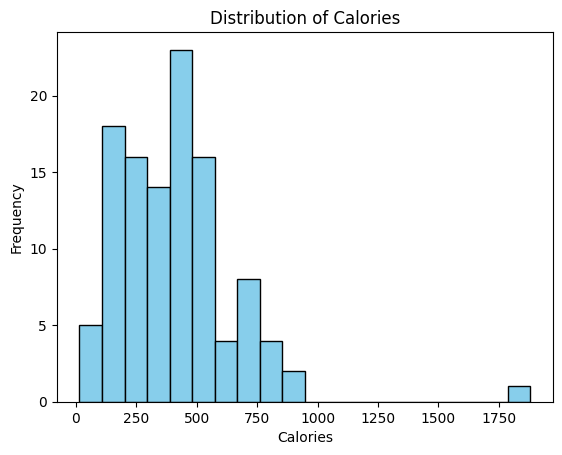

In [44]:
# Histogram of Calories
plt.hist(df_clean['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

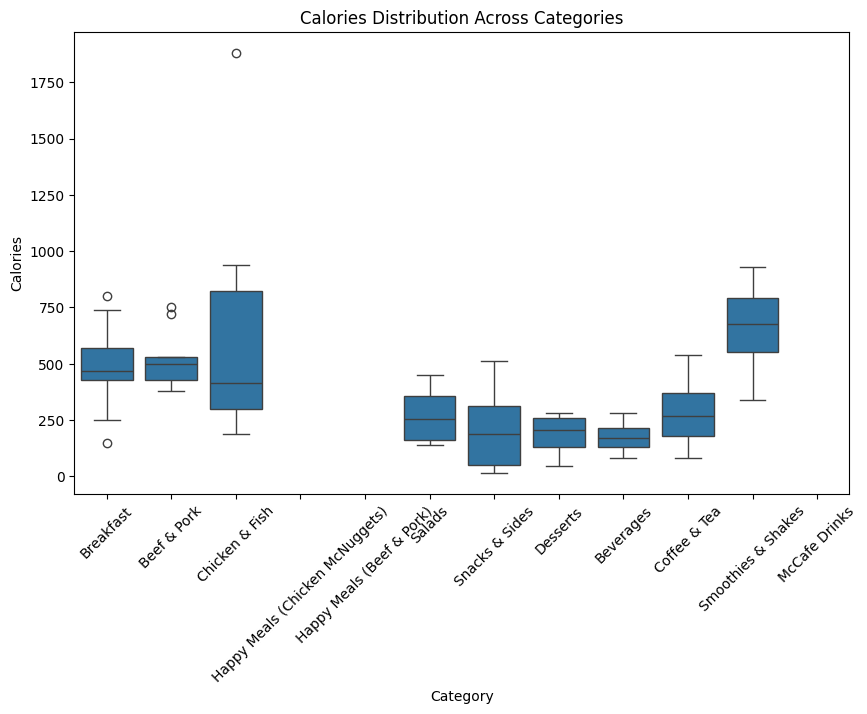

In [45]:
# Boxplot of Calories across Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Calories', data=df_clean)
plt.title('Calories Distribution Across Categories')
plt.xticks(rotation=45)
plt.show()

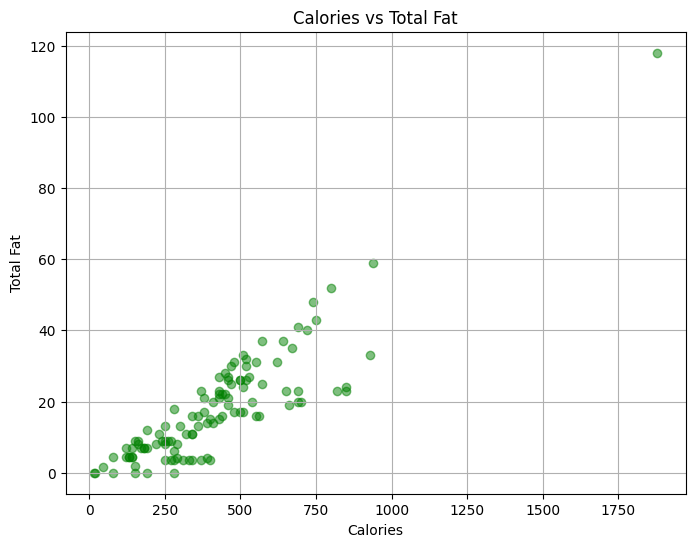

In [46]:
# Scatter plot of Calories vs Total Fat
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Calories'], df_clean['Total Fat'], color='green', alpha=0.5)
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.grid(True)
plt.show()

### 2.1 Correlation between Nutrition Scores and Price
    2.1.1 to find relation betwen price and nutri score we need to calculate the later :
    so i came up with this crapy formulas to do so after barin storming the web about the topic : 
    

In [49]:
# Calculate Pearson correlation coefficient
correlation = df_clean['Nutrition Score'].corr(df_clean['Prices'])

# Print the correlation coefficient
print("Correlation between Nutrition Scores and Prices:", correlation)

Correlation between Nutrition Scores and Prices: 0.22142016973991913


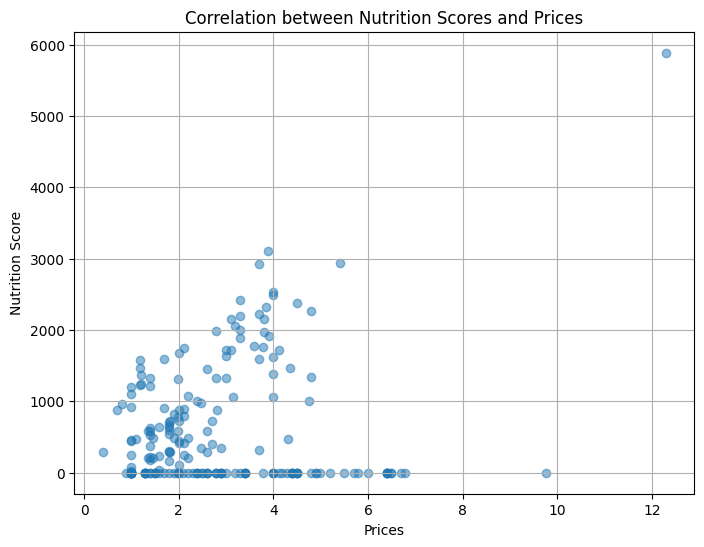

In [50]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Prices'], df_clean['Nutrition Score'], alpha=0.5)
plt.title('Correlation between Nutrition Scores and Prices')
plt.xlabel('Prices')
plt.ylabel('Nutrition Score')
plt.grid(True)
plt.show()


C:\Users\soula\AppData\Local\Temp\ipykernel_15028\4177454778.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.labels_


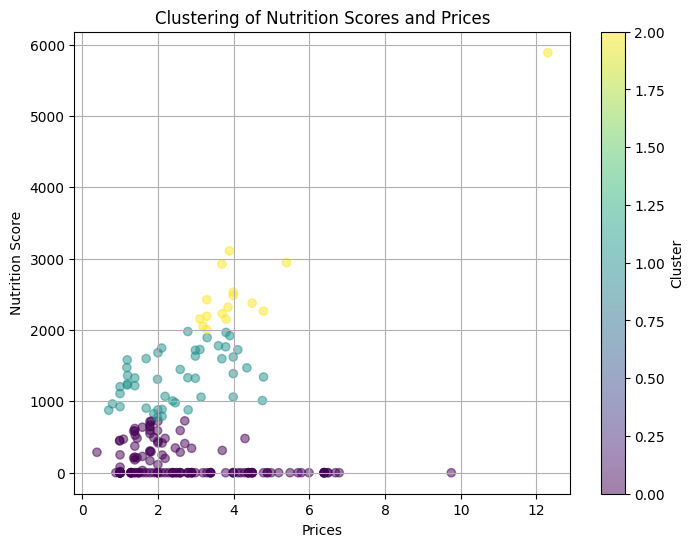

In [51]:
# Extract the features for clustering
X = df_clean[['Prices', 'Nutrition Score']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
kmeans.fit(X)

# Add cluster labels to the DataFrame
df_clean['Cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Prices'], df_clean['Nutrition Score'], c=df_clean['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering of Nutrition Scores and Prices')
plt.xlabel('Prices')
plt.ylabel('Nutrition Score')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

### Understanding the data

### Distribution of Nutrition Scores across Menu Types

### Identifying Healthiest and Unhealthiest Menu Types

### Tracking Nutrition Score Changes Over Time

### Predicting Nutrition Scores Using Machine Learning

### Comparing Nutrition Scores with Industry Benchmarks

### This was a school project that i pulled diffrent resources from the internet to make it happens ....

### due to time constraintes i was unable to find other data for similar fast food chaines ...

### i will come back later with nutrition values of other fast food chianes for comparison ... in the mean time the project will halt here,